<a href="https://colab.research.google.com/github/yuvasreekrishnan/codecraft/blob/main/sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample preprocessed data:


,review,sentiment,cleaned_review
0,This product is amazing! It works perfectly an...,positive,product amazing work perfectly exceeded expect...
1,Worst purchase ever. The item broke after two ...,negative,worst purchase ever item broke two day use
2,"It's okay, not great but not terrible either. ...",neutral,okay great terrible either job
3,The quality is good but the price is too high ...,neutral,quality good price high get
4,I love this product! It's exactly what I was l...,positive,love product exactly looking



Model Evaluation:
Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
     neutral       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: Undefine

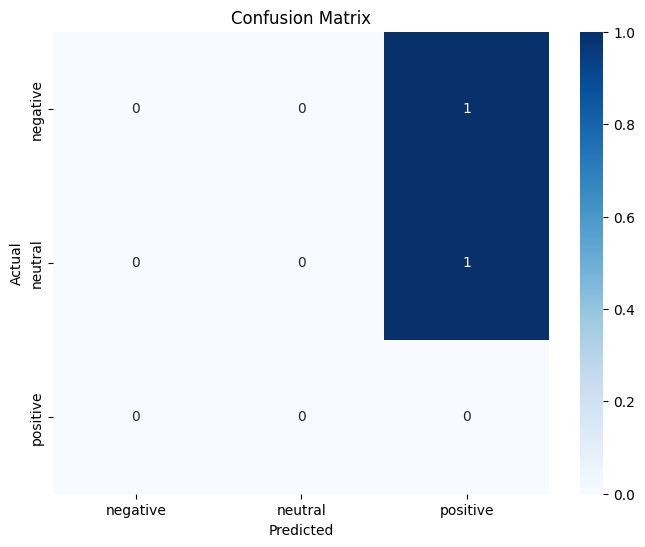


Testing with New Reviews:

Review: This is the best product I've ever bought!
Predicted Sentiment: positive
Probabilities: {'negative': np.float64(0.24556379027812544), 'neutral': np.float64(0.1993588622469337), 'positive': np.float64(0.5550773474749409)}

Review: I'm very disappointed with the quality.
Predicted Sentiment: positive
Probabilities: {'negative': np.float64(0.30007456881161004), 'neutral': np.float64(0.296127465194886), 'positive': np.float64(0.40379796599350404)}

Review: It's fine, nothing special.
Predicted Sentiment: positive
Probabilities: {'negative': np.float64(0.24322781420592704), 'neutral': np.float64(0.2492656282871835), 'positive': np.float64(0.5075065575068894)}


In [1]:
# Install required packages
!pip install numpy pandas matplotlib seaborn scikit-learn nltk

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import re
import string

# Download ALL required NLTK data (fixed)
nltk.download('all', quiet=True)  # This downloads all NLTK data to prevent lookup errors

# Alternative if you want only the necessary components:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')  # Required for WordNet lemmatizer

# Sample dataset
reviews = [
    ("This product is amazing! It works perfectly and exceeded my expectations.", "positive"),
    ("Worst purchase ever. The item broke after two days of use.", "negative"),
    ("It's okay, not great but not terrible either. Does the job.", "neutral"),
    ("The quality is good but the price is too high for what you get.", "neutral"),
    ("I love this product! It's exactly what I was looking for.", "positive"),
    ("Terrible quality. Don't waste your money on this.", "negative"),
    ("The product arrived damaged and customer service was unhelpful.", "negative"),
    ("Works as described. No complaints.", "positive"),
    ("Average product, nothing special about it.", "neutral"),
    ("Excellent value for money. Highly recommended!", "positive")
]

# Create DataFrame
df = pd.DataFrame(reviews, columns=['review', 'sentiment'])

# Text preprocessing function (updated)
def preprocess_text(text):
    try:
        # Convert to lowercase
        text = text.lower()

        # Remove punctuation
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)

        # Remove numbers
        text = re.sub(r'\d+', '', text)

        # Tokenize text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        # Join tokens back into string
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {text}")
        print(f"Error: {e}")
        return ""

# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Display sample data
print("Sample preprocessed data:")
display(df.head())

# Split data into training and testing sets
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Function to predict sentiment of new reviews
def predict_sentiment(review):
    try:
        # Preprocess the review
        cleaned_review = preprocess_text(review)

        # Vectorize the review
        review_tfidf = tfidf_vectorizer.transform([cleaned_review])

        # Predict sentiment
        prediction = model.predict(review_tfidf)

        # Get prediction probabilities
        probabilities = model.predict_proba(review_tfidf)[0]

        return {
            'review': review,
            'predicted_sentiment': prediction[0],
            'sentiment_probabilities': {
                'negative': probabilities[model.classes_ == 'negative'][0],
                'neutral': probabilities[model.classes_ == 'neutral'][0],
                'positive': probabilities[model.classes_ == 'positive'][0]
            }
        }
    except Exception as e:
        print(f"Error predicting sentiment for: {review}")
        print(f"Error: {e}")
        return None

# Test the function with new reviews
print("\nTesting with New Reviews:")
new_reviews = [
    "This is the best product I've ever bought!",
    "I'm very disappointed with the quality.",
    "It's fine, nothing special."
]

for review in new_reviews:
    result = predict_sentiment(review)
    if result:
        print(f"\nReview: {result['review']}")
        print(f"Predicted Sentiment: {result['predicted_sentiment']}")
        print(f"Probabilities: {result['sentiment_probabilities']}")